# Loading_Train_&_Test_Data

In [1]:
#Cell where I'm updating in import functions used in this notebook.

import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt
import pylab
import os
import pandas as pd

from scipy.ndimage import rotate


## Import, Unzip, & read TRAIN Images! (Part 1)

In [2]:
pixels = []
with gzip.open('DataSet_gz_Files/emnist-letters-train-images-idx3-ubyte.gz','rb') as f:
    magic = int.from_bytes(f.read(4), byteorder="big")
    size = int.from_bytes(f.read(4), byteorder="big")
    nrows = int.from_bytes(f.read(4), byteorder="big")
    ncols = int.from_bytes(f.read(4), byteorder="big")
    print(f"Magic no.: {magic}\nNum images: {size}\nImage res: {nrows}x{ncols}")
    d = f.read(1)
    while d != b"":
        pixels.append(d)
        d = f.read(1)
        
print(len(pixels))

Magic no.: 2051
Num images: 124800
Image res: 28x28
97843200


In [3]:
#Import, Unzip, & read Train Images! (Part 2)

size_less = 31360
pixels = pixels[:size_less]
data = []
step = 0
total = len(pixels)
for p in pixels:
    data.append(int.from_bytes(p, byteorder="big"))
    print(f"{step}/{total}", end = "\r")
    step += 1
    
print("")
data = np.array(data, dtype=np.uint8).reshape((40, nrows, ncols))

len(pixels)

4582/31360

26269/31360

30627/31360

31359/31360


31360

In [4]:
#Import, Unzip, & read Train Images! (Part 3)

data_list = []

for a in data:
    a_fixed = np.fliplr(rotate(a,270))
    data_list.append(a_fixed)

In [5]:
data_list = np.array(data_list).reshape(40,28,28)
data_list.shape

(40, 28, 28)

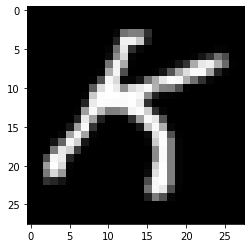

In [10]:
x = data_list[7]
plt.imshow(x, cmap='gray')
plt.show()

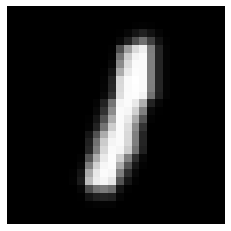

In [11]:
count=0
for images in data_list[0:40]:
    pylab.axes(frameon=False,xticks=[],yticks=[])
    pylab.imshow(images, cmap='gray')
    pylab.savefig(fname="Letters_data/Train/Image"+str(count)+".jpg", bbox_inches="tight",pad_inches=0)
    count+=1

In [12]:
Dataset = os.listdir("Letters_data/Train")
Dataset = pd.DataFrame(Dataset,columns=["Image"])
Dataset

,Image
0,Image0.jpg
1,Image1.jpg
2,Image2.jpg
3,Image3.jpg
4,Image4.jpg
5,Image5.jpg
6,Image6.jpg
7,Image7.jpg
8,Image8.jpg
9,Image9.jpg


In [13]:
image_path = []
pic_dir = os.listdir("Letters_data/Train")

for item in pic_dir:
    image_path.append("Letters_data/Train/"+item)

image_path_df = pd.DataFrame(image_path,columns=["Image Path"])

In [14]:
Image_dataset = pd.concat([Dataset,image_path_df],axis=1)
Image_dataset

,Image,Image Path
0,Image0.jpg,Letters_data/Train/Image0.jpg
1,Image1.jpg,Letters_data/Train/Image1.jpg
2,Image2.jpg,Letters_data/Train/Image2.jpg
3,Image3.jpg,Letters_data/Train/Image3.jpg
4,Image4.jpg,Letters_data/Train/Image4.jpg
5,Image5.jpg,Letters_data/Train/Image5.jpg
6,Image6.jpg,Letters_data/Train/Image6.jpg
7,Image7.jpg,Letters_data/Train/Image7.jpg
8,Image8.jpg,Letters_data/Train/Image8.jpg
9,Image9.jpg,Letters_data/Train/Image9.jpg


## Import, Unzip, & read TRAIN Labels! (Part 1)

In [15]:
Labels = []
with gzip.open('DataSet_gz_Files/emnist-letters-train-labels-idx1-ubyte.gz','rb') as f:
    magic = int.from_bytes(f.read(4), byteorder="big")
    size = int.from_bytes(f.read(4), byteorder="big")
                                                    
    print(f"Magic no.: {magic}\nNum items: {size}")
    d = f.read(1)
    while d != b"":
        Labels.append(d)
        d = f.read(1)
        
print(len(Labels))

Magic no.: 2049
Num items: 124800
124800


In [16]:
#Import, Unzip, & read Train LABELS! (Part 2)

size_less = 40 
Labels = Labels[0:40]
Labels_data = []
step = 0
total = len(Labels)
for p in Labels:
    Labels_data.append(int.from_bytes(p, byteorder="big"))
    print(f"{step}/{total}", end = "\r")
    step += 1
    
print("")
Labels_data = np.array(Labels_data, dtype=np.uint8)

39/40


In [17]:
labels_data_df = pd.DataFrame(Labels_data,columns=["Labels"])
labels_df = pd.DataFrame(Labels_data,columns=["Letters"])

In [18]:
Labels_df = pd.concat([labels_data_df,labels_df],axis=1)

In [20]:
Labels_df.Letters.replace({
    1:'A',
    2:'B',
    3:'C',
    4:'D',
    5:'E',
    6:'F',
    7:'G',
    8:'H',
    9:'I',
    10:'J',
    11:'K',
    12:'L',
    13:'M',
    14:'N',
    15:'O',
    16:'P',
    17:'Q',
    18:'R',
    19:'S',
    20:'T',
    21:'U',
    22:'V',
    23:'W',
    24:'X',
    25:'Y',
    26:'Z'
    
},inplace=True)

In [21]:
Images_And_Labels_df = pd.concat([Image_dataset,Labels_df],axis=1)
Images_And_Labels_df

,Image,Image Path,Labels,Letters
0,Image0.jpg,Letters_data/Train/Image0.jpg,23,W
1,Image1.jpg,Letters_data/Train/Image1.jpg,7,G
2,Image2.jpg,Letters_data/Train/Image2.jpg,16,P
3,Image3.jpg,Letters_data/Train/Image3.jpg,15,O
4,Image4.jpg,Letters_data/Train/Image4.jpg,23,W
5,Image5.jpg,Letters_data/Train/Image5.jpg,17,Q
6,Image6.jpg,Letters_data/Train/Image6.jpg,13,M
7,Image7.jpg,Letters_data/Train/Image7.jpg,11,K
8,Image8.jpg,Letters_data/Train/Image8.jpg,22,V
9,Image9.jpg,Letters_data/Train/Image9.jpg,24,X


## Import, Unzip, & read TEST Images! (Part 1)

In [29]:
Test_pixels = [] 
with gzip.open('DataSet_gz_Files/emnist-letters-test-images-idx3-ubyte.gz','rb') as f:
    magic = int.from_bytes(f.read(4), byteorder="big")
    size = int.from_bytes(f.read(4), byteorder="big")
    nrows = int.from_bytes(f.read(4), byteorder="big")
    ncols = int.from_bytes(f.read(4), byteorder="big")
    print(f"Magic no.: {magic}\nNum images: {size}\nImage res: {nrows}x{ncols}")
    d = f.read(1)
    while d != b"":
        Test_pixels.append(d)
        d = f.read(1)
        
print(len(Test_pixels))

Magic no.: 2051
Num images: 20800
Image res: 28x28
16307200


In [30]:
#Import, Unzip, & read Test Images! (Part 2)

T_size_less = 31360
Test_pixels = Test_pixels[:T_size_less]
T_data = []
T_step = 0
T_total = len(Test_pixels)
for p in Test_pixels:
    T_data.append(int.from_bytes(p, byteorder="big"))
    print(f"{T_step}/{T_total}", end = "\r")
    T_step += 1
    
print("")
T_data = np.array(T_data, dtype=np.uint8).reshape((40, nrows, ncols))

len(Test_pixels)

13289/31360

17597/31360

22237/31360

31049/31360

31359/31360


31360

In [31]:
#Import, Unzip, & read Test Images! (Part 3)

data_list2 = []

for a in T_data:
    a_fixed2 = np.fliplr(rotate(a,270))
    data_list2.append(a_fixed2)

In [32]:
data_list2 = np.array(data_list2).reshape(40,28,28)
data_list2.shape

(40, 28, 28)

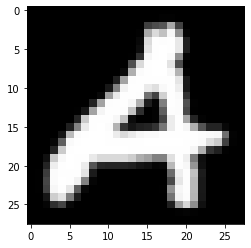

In [33]:
x2 = data_list2[9]
plt.imshow(x2, cmap='gray')
plt.show()

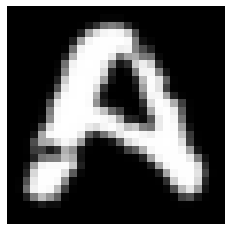

In [34]:
count2=0
for images2 in data_list2[0:40]:
    pylab.axes(frameon=False,xticks=[],yticks=[])
    pylab.imshow(images2, cmap='gray')
    pylab.savefig(fname="Letters_data/Test/Test_Image"+str(count2)+".jpg", bbox_inches="tight",pad_inches=0)
    count2+=1

In [35]:
Dataset2 = os.listdir("Letters_data/Test")
Dataset2 = pd.DataFrame(Dataset2,columns=["Test_Image"])
Dataset2

,Test_Image
0,Test_Image0.jpg
1,Test_Image1.jpg
2,Test_Image2.jpg
3,Test_Image3.jpg
4,Test_Image4.jpg
5,Test_Image5.jpg
6,Test_Image6.jpg
7,Test_Image7.jpg
8,Test_Image8.jpg
9,Test_Image9.jpg


In [36]:
image_path2 = []
pic_dir2 = os.listdir("Letters_data/Test")

for item2 in pic_dir2:
    image_path2.append("Letters_data/Test/"+item2)

image_path2_df = pd.DataFrame(image_path2,columns=["Image Path"])

In [37]:
Image_dataset2 = pd.concat([Dataset2,image_path2_df],axis=1)
Image_dataset2

,Test_Image,Image Path
0,Test_Image0.jpg,Letters_data/Test/Test_Image0.jpg
1,Test_Image1.jpg,Letters_data/Test/Test_Image1.jpg
2,Test_Image2.jpg,Letters_data/Test/Test_Image2.jpg
3,Test_Image3.jpg,Letters_data/Test/Test_Image3.jpg
4,Test_Image4.jpg,Letters_data/Test/Test_Image4.jpg
5,Test_Image5.jpg,Letters_data/Test/Test_Image5.jpg
6,Test_Image6.jpg,Letters_data/Test/Test_Image6.jpg
7,Test_Image7.jpg,Letters_data/Test/Test_Image7.jpg
8,Test_Image8.jpg,Letters_data/Test/Test_Image8.jpg
9,Test_Image9.jpg,Letters_data/Test/Test_Image9.jpg


# Import, Unzip, & read TEST Labels! (Part 1)

In [46]:
Labels2 = []
with gzip.open('DataSet_gz_Files/emnist-letters-test-labels-idx1-ubyte.gz','rb') as f:
    magic2 = int.from_bytes(f.read(4), byteorder="big")
    size2 = int.from_bytes(f.read(4), byteorder="big")
                                                    
    print(f"Magic no.: {magic2}\nNum items: {size2}")
    d2 = f.read(1)
    while d2 != b"":
        Labels2.append(d2)
        d2 = f.read(1)
        
print(len(Labels2))

Magic no.: 2049
Num items: 20800
20800


In [47]:
#Import, Unzip, & read Train LABELS! (Part 2)

size_less2 = 40 
Labels2 = Labels2[0:40]
Labels_data2 = []
step2 = 0
total2 = len(Labels2)
for p in Labels2:
    Labels_data2.append(int.from_bytes(p, byteorder="big"))
    print(f"{step2}/{total2}", end = "\r")
    step2 += 1
    
print("")
Labels_data2 = np.array(Labels_data2, dtype=np.uint8)

39/40


In [48]:
Labels_data2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [49]:
labels_data2_df = pd.DataFrame(Labels_data2,columns=["Labels"])
labels2_df = pd.DataFrame(Labels_data2,columns=["Letters"])

In [50]:
Labels2_df = pd.concat([labels_data2_df,labels2_df],axis=1)

In [51]:
Labels2_df.Letters.replace({
    1:'A',
    2:'B',
    3:'C',
    4:'D',
    5:'E',
    6:'F',
    7:'G',
    8:'H',
    9:'I',
    10:'J',
    11:'K',
    12:'L',
    13:'M',
    14:'N',
    15:'O',
    16:'P',
    17:'Q',
    18:'R',
    19:'S',
    20:'T',
    21:'U',
    22:'V',
    23:'W',
    24:'X',
    25:'Y',
    26:'Z'
    
},inplace=True)

In [52]:
Images_And_Labels2_df = pd.concat([Image_dataset2,Labels2_df],axis=1)
Images_And_Labels2_df

,Test_Image,Image Path,Labels,Letters
0,Test_Image0.jpg,Letters_data/Test/Test_Image0.jpg,1,A
1,Test_Image1.jpg,Letters_data/Test/Test_Image1.jpg,1,A
2,Test_Image2.jpg,Letters_data/Test/Test_Image2.jpg,1,A
3,Test_Image3.jpg,Letters_data/Test/Test_Image3.jpg,1,A
4,Test_Image4.jpg,Letters_data/Test/Test_Image4.jpg,1,A
5,Test_Image5.jpg,Letters_data/Test/Test_Image5.jpg,1,A
6,Test_Image6.jpg,Letters_data/Test/Test_Image6.jpg,1,A
7,Test_Image7.jpg,Letters_data/Test/Test_Image7.jpg,1,A
8,Test_Image8.jpg,Letters_data/Test/Test_Image8.jpg,1,A
9,Test_Image9.jpg,Letters_data/Test/Test_Image9.jpg,1,A
